In [6]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from deeplearning.classifiers.cnn import *
from deeplearning.data_utils import get_CIFAR10_data
from deeplearning.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from deeplearning.layers import *
from deeplearning.fast_layers import *
from deeplearning.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [7]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


In [8]:
print data['y_test'].dtype

int64


In [4]:
# Train a really good model on CIFAR-10
from deeplearning.classifiers.convnet1 import *
model = HaoConvNet1(weight_scale=0.006, hidden_dim=256, reg=0.001)

solver = Solver(model, data,
                num_epochs=20, batch_size=128,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=20)
solver.train()

(Iteration 1 / 7640) loss: 2.323137
(Epoch 0 / 20) train acc: 0.216000; val_acc: 0.216000
(Iteration 21 / 7640) loss: 1.819164
(Iteration 41 / 7640) loss: 1.754745
(Iteration 61 / 7640) loss: 1.466839
(Iteration 81 / 7640) loss: 1.364614
(Iteration 101 / 7640) loss: 1.401973
(Iteration 121 / 7640) loss: 1.262280
(Iteration 141 / 7640) loss: 1.428023
(Iteration 161 / 7640) loss: 1.439044
(Iteration 181 / 7640) loss: 1.330639
(Iteration 201 / 7640) loss: 1.350520
(Iteration 221 / 7640) loss: 1.145895
(Iteration 241 / 7640) loss: 1.273497
(Iteration 261 / 7640) loss: 1.148493
(Iteration 281 / 7640) loss: 1.049659
(Iteration 301 / 7640) loss: 1.142261
(Iteration 321 / 7640) loss: 1.238940
(Iteration 341 / 7640) loss: 1.154917
(Iteration 361 / 7640) loss: 1.152993
(Iteration 381 / 7640) loss: 0.972970
Time elapsed (hh:mm:ss.ms) 0:10:18.562127
(Epoch 1 / 20) train acc: 0.670000; val_acc: 0.624000
(Iteration 401 / 7640) loss: 0.935667
(Iteration 421 / 7640) loss: 1.206910
(Iteration 441 / 764

(Iteration 3761 / 7640) loss: 0.470173
(Iteration 3781 / 7640) loss: 0.490432
(Iteration 3801 / 7640) loss: 0.446498
Time elapsed (hh:mm:ss.ms) 1:33:10.993864
(Epoch 10 / 20) train acc: 0.920000; val_acc: 0.682000
(Iteration 3821 / 7640) loss: 0.457439
(Iteration 3841 / 7640) loss: 0.354959
(Iteration 3861 / 7640) loss: 0.336990
(Iteration 3881 / 7640) loss: 0.339507
(Iteration 3901 / 7640) loss: 0.365710
(Iteration 3921 / 7640) loss: 0.367389
(Iteration 3941 / 7640) loss: 0.400461
(Iteration 3961 / 7640) loss: 0.405136
(Iteration 3981 / 7640) loss: 0.376399
(Iteration 4001 / 7640) loss: 0.423737
(Iteration 4021 / 7640) loss: 0.388824
(Iteration 4041 / 7640) loss: 0.468637
(Iteration 4061 / 7640) loss: 0.361355
(Iteration 4081 / 7640) loss: 0.398136
(Iteration 4101 / 7640) loss: 0.440251
(Iteration 4121 / 7640) loss: 0.336831
(Iteration 4141 / 7640) loss: 0.356751
(Iteration 4161 / 7640) loss: 0.362438
(Iteration 4181 / 7640) loss: 0.356370
(Iteration 4201 / 7640) loss: 0.413197
Time e

(Iteration 7481 / 7640) loss: 0.173478
(Iteration 7501 / 7640) loss: 0.213919
(Iteration 7521 / 7640) loss: 0.190764
(Iteration 7541 / 7640) loss: 0.168316
(Iteration 7561 / 7640) loss: 0.165545
(Iteration 7581 / 7640) loss: 0.163810
(Iteration 7601 / 7640) loss: 0.162924
(Iteration 7621 / 7640) loss: 0.171422
Time elapsed (hh:mm:ss.ms) 3:03:45.414415
(Epoch 20 / 20) train acc: 0.993000; val_acc: 0.683000


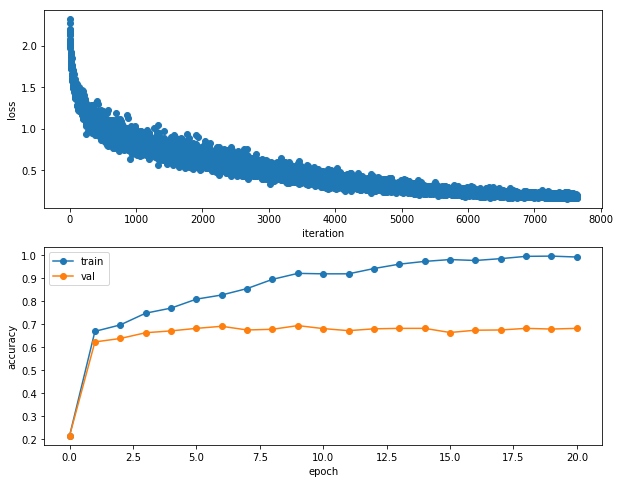

In [5]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [6]:
test_acc = solver.check_accuracy(data['X_test'], data['y_test'])
print 'test acc: %f' % (test_acc)

test acc: 0.665000


In [14]:
# Train a really good model on CIFAR-10
from deeplearning.classifiers.convnet1 import *
model = HaoConvNet1(weight_scale=0.006, hidden_dim=512, reg=0.001)

solver = Solver(model, data,
                num_epochs=5, batch_size=128,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=20)
solver.train()

(Iteration 1 / 1910) loss: 2.348706
(Epoch 0 / 5) train acc: 0.217000; val_acc: 0.251000
(Iteration 21 / 1910) loss: 1.735924
(Iteration 41 / 1910) loss: 1.712341
(Iteration 61 / 1910) loss: 1.545864
(Iteration 81 / 1910) loss: 1.498586
(Iteration 101 / 1910) loss: 1.402662
(Iteration 121 / 1910) loss: 1.561062
(Iteration 141 / 1910) loss: 1.214385
(Iteration 161 / 1910) loss: 1.292440
(Iteration 181 / 1910) loss: 1.282835
(Iteration 201 / 1910) loss: 1.236076
(Iteration 221 / 1910) loss: 1.523616
(Iteration 241 / 1910) loss: 1.296562
(Iteration 261 / 1910) loss: 1.237013
(Iteration 281 / 1910) loss: 1.182537
(Iteration 301 / 1910) loss: 1.241752
(Iteration 321 / 1910) loss: 1.211907
(Iteration 341 / 1910) loss: 1.093578
(Iteration 361 / 1910) loss: 1.169840
(Iteration 381 / 1910) loss: 1.139242
Time elapsed (hh:mm:ss.ms) 0:10:48.276008
(Epoch 1 / 5) train acc: 0.642000; val_acc: 0.604000
(Iteration 401 / 1910) loss: 1.162289
(Iteration 421 / 1910) loss: 1.092646
(Iteration 441 / 1910)

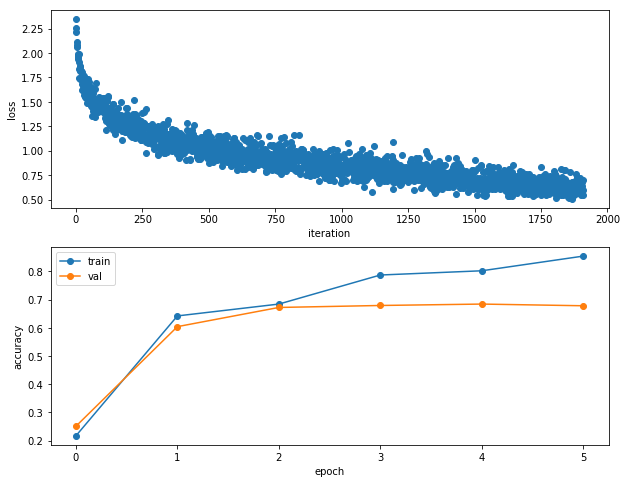

In [15]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [16]:
test_acc = solver.check_accuracy(data['X_test'], data['y_test'])
print 'test acc: %f' % (test_acc)

test acc: 0.670000
